Things one can focus at or pipeline sketch:

1. [Build] Creating a robust and easy-implementable paraphrasing pipeline.

2. [Modify] Creating a way to balance unbalanced datasets using paraphrasing (involves detection of imbalance)

3. [Test]: Challenge existing text data augmentation methods

In [2]:
import pandas as pd

df = pd.read_csv('../data/paraphrasings_og_train_2148rows_seed42.csv')



,label,New,org_or_new
0,positive,"Øh, tak! Her er et link til et interview, der ...",0
1,neutral,"det kan være værdt at nævne, at dyr også vari...",0
2,negative,"#3 Om ateismen: ""Ateister mener, at religione...",0
3,negative,Øjeblikkeligt: Vild jubel over forøget politiu...,0
4,negative,Selvom vi ikke ved det præcise datum for næst...,0
...,...,...,...
3312,negative,"Hun er 12 og voksen på den måde, man kun kan v...",1
3313,positive,Kalder alle Broncos-fans. \n\nDrew Lock har be...,1
3314,neutral,Se masser af billeder fra det traditionelle ra...,1
3315,positive,Mere #entrepreneurshipeducation og mere #godun...,1


In [3]:
import pandas as pd
# create a pseudo dataset with three columns, the first containing strings, the second containing integers, and the third containing floats
# the dataset should have 10 rows

list= ["Jeg en går mig bygge vil",
       "Jeg gik mig over sø og land",
        "der mødte jeg en gammel mand"]

df= pd.DataFrame({'col1': list,
                'col2': [1, 2, 3],
                'col3': [1.1, 2.2, 3.3]})

df.to_csv('../data/minidf_for_test.csv', index=False)

In [33]:
import pandas as pd
cleaned = pd.read_csv('/Users/wibe/Desktop/CogSci/NLP/NLP_exam_2023/data/paraphrasingsNEW.csv')
original = pd.read_csv('/Users/wibe/Desktop/CogSci/NLP/NLP_exam_2023/data/TO_PARAPHRASE_9DEC.csv')

cleaned = cleaned[['New']]
# add a new column to cleaned with 0's
cleaned['type'] = 0
original['type'] = 1

cleaned['label'] = original['label']

original = original[['text', 'type', 'label']]

cleaned['text'] = cleaned[['New']]
cleaned = cleaned[['text', 'type', 'label']]


# combine the rows of the two dataframes
frames = [original, cleaned]
result = pd.concat(frames)
result

result.to_csv('/Users/wibe/Desktop/CogSci/NLP/NLP_exam_2023/data/combined_df_10DEC.csv', index=False)

In [13]:

# add 

# add column 'New' from df cleaned to df original
original['paraphrased'] = cleaned['New']

# add 

# drop all columns except 'paraphrased' and 'Original' and 'labels'ArithmeticError
#original = original[['Original', 'paraphrased', 'labels']]

original.columns

Index(['Unnamed: 0', 'text', 'label', 'paraphrased'], dtype='object')

In [10]:
import pandas as pd
cleaned = pd.read_csv('/Users/wibe/Desktop/CogSci/NLP/NLP_exam_2023/data/paraphrasingsNEW.csv')


# make a dataframe with only the columns 'text', 'text_paraphrase', 'label'
paraphrased_train = cleaned[['Original', 'label']]
text_train = cleaned[['text', 'label']]


# Add a new column to indicate whether each sentence is original or paraphrased
paraphrased_train['is_paraphrased'] = 1
text_train['is_paraphrased'] = 0

# Rename the columns to the same name
paraphrased_train = paraphrased_train.rename(columns={'text_paraphrase': 'text'})
text_train = text_train.rename(columns={'text': 'text'})

# Concatenate the two dataframes
combined = pd.concat([text_train, paraphrased_train], ignore_index=True)

combined.to_csv('data/twitter_data_combined.csv', index=False)

/var/folders/ll/fp10h_1j0d1ddcld2t3r_dpr0000gn/T/ipykernel_13194/887926527.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paraphrased_train['is_paraphrased'] = 1
/var/folders/ll/fp10h_1j0d1ddcld2t3r_dpr0000gn/T/ipykernel_13194/887926527.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_train['is_paraphrased'] = 0


In [ ]:
# Rename the columns to the same name
paraphrased_train = paraphrased_train.rename(columns={'text_paraphrase': 'text'})
text_train = text_train.rename(columns={'text': 'text'})

# Concatenate the two dataframes
combined = pd.concat([text_train, paraphrased_train], ignore_index=True)

In [4]:

import pandas as pd
df = pd.read_csv('/Users/wibe/Desktop/CogSci/NLP/NLP_exam_2023/data/twitter_data_train.csv', )

twitter_data_train_small = df[0:5]

# to csv
twitter_data_train_small.to_csv('/Users/wibe/Desktop/CogSci/NLP/NLP_exam_2023/data/twitter_data_train_small.csv', index=False)

In [19]:
#############################################################################################
####### NB: before running this, run the following in the terminal:  ########################
#############################################################################################

#1# CT_METAL=1 pip install ctransformers --no-binary ctransformers
#2# pip install huggingface-hub
#3# huggingface-cli download TheBloke/OpenHermes-2.5-Mistral-7B-GGUF openhermes-2.5-mistral-7b.Q4_K_M.gguf --local-dir . --local-dir-use-symlinks False
# ^ the first command makes the model run MUCH faster if you're on a M1 mac with at GPU, command 2 and 3 downloads the mistral model to your working directory


# playing with mistral
from ctransformers import AutoModelForCausalLM



def make_input_mistral(phrase: str) -> str: # examples should be a dataset with column 0 being the original text and column 1 being the paraphrased text
    system = f"""Your task is to proficiently understand and communicate in Danish. You are required to rephrase text in Danish while adhering to the following rules:

1. Avoid repeating yourself.
2. Refrain from using the same sentence as in the original text.
3. Maintain a similar text length to the original.
4. Ensure the context remains consistent with the original text.

Please provide your rephrased response in Danish, observing the given rules and maintaining the context of the original text.
    """

    prompt = f"""
    <|im_start|>system
    {system}<|im_end|>
    <|im_start|>user
    {phrase}<|im_end|>
    <|im_start|>assistant
    """

    return prompt

def load_mistral(model_path):
    model = AutoModelForCausalLM.from_pretrained(
        str(model_path), 
        model_type="mistral",
        gpu_layers=50,
        temperature=0.8, # default is 0.8
        top_p = 0.95,
        top_k = 40,  # default is 0.95
        max_new_tokens = 1000,
        context_length = 6000)
    
    return model



strings = ["Hvad er en meningen med livet?", "hvorfor er der så mange mennesker i verden?"]

max_new_tokens = 50

model = load_mistral(root_dir / "models" / "openhermes-2.5-mistral-7b.Q4_K_M.gguf")

for question in strings:
    print(question)
    print(model(make_input_mistral(question)))

In [20]:
import os
from pathlib import Path

max_new_tokens = 50

model = load_mistral(os.path.join("model", "openhermes-2.5-mistral-7b.Q4_K_M.gguf"))

strings = ["Partiet Venstre er et borgerligt parti.",
           "Social demokraterne var i regering fra 2011 til 2015.",
           "Radikale venstre synes at skatten var for høj."]

#for string in tqdm(original):
#    new = model(make_input_mistral(string))
#    print(f'[Original] {string} || [New] {new}')


df = generate_dataframe(original, model)
print(df.head())


100%|██████████| 20/20 [02:18<00:00,  6.95s/it]


,Original,New
0,Danmark kan ikke leve af gæld.,Økonomisk ubalancering vil vare i Danmark indt...
1,Efter et regeringsskifte vil den økonomiske po...,"Efter et skift i regeringen, vil den nye økon..."
2,"Vi vil oprette et agentur mod falske nyheder, ...",Ønsket om at danne en organisation til bekæmpe...
3,Lige netop sygeskatten kunne have været et uds...,Ønsket om at indføre sygeskatten kunne have væ...
4,"HK, har ønsket at få kønsopdelt lønstatistik.",LO og DA kan også støtte HK's ønske om lønsta...
5,"Så jeg synes, det er ret svært, når man skal i...",\n Det virker ubedrageligt at tvange to så ...
6,Grænseoverskridende problemer må løses gennem ...,Grænseoverskridende problemer skal løses ved ...
7,Forskellen mellem virkningerne på beskæftigels...,"Øget uddannelsesindsats er en faktor, der bidr..."
8,"Det er sådan, at jeg lige har været inde at tj...",\n Så det var en læringstilfælde for dig? O...
9,Det ene er at give borgerne mulighed for frit ...,Ønsket om at give borgerne mulighed for frit a...


In [7]:
df

,Original,New
0,Danmark kan ikke leve af gæld.,Økonomien ved uundgåelige skuldsatser truer me...
1,Efter et regeringsskifte vil den økonomiske po...,Så længe man tager foresigtsfyldt initiativer...
2,"Vi vil oprette et agentur mod falske nyheder, ...",Vi skal danne en organisation til bekæmpelse ...
3,Lige netop sygeskatten kunne have været et uds...,Ønsket om sygeskatteudspillet kunne have brugt...
4,"HK, har ønsket at få kønsopdelt lønstatistik.",Ønsker HK statistikker over lønninger opdelt e...
5,"Så jeg synes, det er ret svært, når man skal i...","Det er udmærket forståeligt, at det kan være ..."
6,Grænseoverskridende problemer må løses gennem ...,Økonomiske udfordringer kræver en internationa...
7,Forskellen mellem virkningerne på beskæftigels...,Øget uddannelsesniveau blandt beskæftigede har...
8,"Det er sådan, at jeg lige har været inde at tj...","\n Det er sådan, at jeg lige har været inde..."
9,Det ene er at give borgerne mulighed for frit ...,\n Det ene er at give danskere frihed til a...


# 1. Paraphrasing pipeline

Token

In [1]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("berkeley-nest/Starling-LM-7B-alpha")
model = AutoModelForCausalLM.from_pretrained("berkeley-nest/Starling-LM-7B-alpha")

/Users/wibe/Desktop/CogSci/NLP/Exam_project/NLP_exam_2023/venv_NLP_exam/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
tokenizer_config.json: 100%|██████████| 1.61k/1.61k [00:00<00:00, 601kB/s]
tokenizer.model: 100%|██████████| 493k/493k [00:00<00:00, 1.46MB/s]
tokenizer.json: 100%|██████████| 1.80M/1.80M [00:01<00:00, 1.50MB/s]
added_tokens.json: 100%|██████████| 53.0/53.0 [00:00<00:00, 96.4kB/s]
special_tokens_map.json: 100%|██████████| 560/560 [00:00<00:00, 1.21MB/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
config.json: 100%|██████████| 613/613 [00:00<00:00, 1.26MB/s]
model.safetensors.index.json: 100%|██████████| 23.9k/23.9k [00:00<00:00, 14.3MB/s]
model-00001-of-00003.safetensors:   7%|▋         | 346M/4.94G [02:51<38:01, 

KeyboardInterrupt: 

In [4]:
import openai
import os

openai.api_key = os.environ["OPENAI_API_KEY"]

# show version of openai
print(openai.__version__)


0.27.7


In [2]:
message = """
1.	Danmark kan ikke leve af gæld.
2.	Efter et regeringsskifte vil den økonomiske politik bygge på et meget klart forsigtighedsprincip.
3.	Vi vil oprette et agentur mod falske nyheder, der udarbejder modsvar og korrigerer falske nyhedshistorier i Danmark.
4.	Lige netop sygeskatten kunne have været et udspil, som LO og DA kunne have brugt selv til at få forhandlingerne på gled igen - alt i alt et indgreb og en lovgivning, der er tydeligt præget af at være udarbejdet af politikere fra Overdanmark med funktionærverdenen som eneste erfaringsgrundlag og uden særlig meget viden om, hvor skoen trykker.
5.	HK har ønsket at få kønsopdelt lønstatistik.
6.	Så jeg synes, det er ret svært, når man skal igennem de her ting, og jeg synes heller ikke, vi kan være bekendt, at noget, der er så vigtigt som forbrugernes sikkerhed, når det gælder medicin, skal puttes ind sammen med en hel masse andre ting.
7.	Grænseoverskridende problemer må løses gennem et grænseoverskridende samarbejde.
8.	Forskellen mellem virkningerne på beskæftigelse og arbejdsløshed ligger i den øgede uddannelsesindsats.
9.	Det er sådan, at jeg lige har været inde at tjekke min ordførertale, så jeg ikke skulle få samme svada fra hr.
10.	Det ene er at give borgerne mulighed for frit at kunne rejse rundt i Europa, så de f.eks. ikke skal stå i lange køer, når de skal på ferie nede sydpå.
11.	Derfor har vi også i den seneste folketingsperiode givet forsvaret det substantielle løft, som vi lovede, at der ville komme.
12.	Dansk Folkeparti har her fremsat et beslutningsforslag, der pålægger regeringen at arbejde for en ændring af reglerne for EF-Domstolens arbejde, og så vidt jeg ved, skal det drøftes den 13. marts.
13.	Vi skal være bedre til at få nye idéer omsat til produktion.
14.	Vi har selvfølgelig noteret os, at der ikke er flertal for vores forslag.
15.	Ved at starte en forbudsprocedure med udgangspunkt i listen over uønskede stoffer og de hormonforstyrrende kategori 1-stoffer i kosmetik tages et vigtigt skridt i den rigtige retning.
16.	Mænd og kvinder og i øvrigt alle andre grupper skal have lige muligheder for at udfylde deres personlige potentiale.
17.	Undervejs har vi truffet hårde beslutninger.
18.	Regeringen magtede ikke at fortsætte en politik, som kunne forbedre erhvervslivets forhold.
19.	Derfor undrer det mig, at der er så meget tvivl, og at man kan tro, at vi vil tage 20 pct. af de unge mennesker ind i den her ordning.
20.	Så det går da trods alt, også i forhold til tallene fra sidste år, den rigtige vej.
"""


In [ ]:
# Note: you need to be using OpenAI Python v0.27.0 for the code below to work
import openai

response = openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
        {"role": "system", "content": "Paraphrase the following sentence (in Danish): "},
        {"role": "user", "content": message},
    ]
)

In [5]:
# show completed chat
response['choices'][0]['message']['content']

'1. Danmark kan ikke overleve ved at have gæld.\n2. Efter et regeringsskifte vil den økonomiske politik være baseret på et klart forsigtighedsprincip.\n3. Vi vil etablere en agentur mod falske nyheder, som vil udarbejde modsvar og rette falske nyhedshistorier i Danmark.\n4. Netop sygeskat kunne have været et udspil, som LO og DA selv kunne have brugt til at få forhandlingerne på sporet igen - alt i alt en indgriben og lovgivning, som tydeligvis er udviklet af politikere fra Overdanmark med kun funktionsverdenen som deres erfaringsgrundlag og uden særlig meget viden om, hvor problemet ligger.\n5. HK har ønsket at få opdelt lønstatistik efter køn.\n6. Så jeg synes, det er ret svært, når man skal igennem alt dette, og jeg synes heller ikke, at det er forsvarligt, at noget, der er så vigtigt som forbrugernes sikkerhed vedrørende medicin, bliver bundtet sammen med en masse andre ting.\n7. Problemer på tværs af grænser skal løses gennem et internationalt samarbejde.\n8. Forskellen mellem eff

In [5]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "This is example sentence"]

model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
embeddings = model.encode(sentences)
#print(embeddings)

# print cosine-similarities betwen the sentences
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([embeddings[0]], [embeddings[1]])

array([[0.987843]], dtype=float32)

In [18]:
import pandas as pd

paraphrasings = pd.read_csv("data/paraphrasings_new.csv")
paraphrased_texts = paraphrasings["New"].tolist()

print(len(paraphrased_texts))

original = pd.read_csv("data/train_data.csv")
original_texts = original["text"].tolist()
print(len(original_texts))



# concatenate the two dataframes
#df = pd.concat([original, paraphrasings], axis=0, ignore_index=True)

1731
1732


In [21]:
original.iloc[:,1]

0       Det kan jo slet ikke forslå. Men den regnemeto...
1       Tidligere kunne fortælle, at en tysk burgerkæd...
2       Nej. Og det er jeg også imod per princip. Man ...
3       Jeg synes faktisk, det sprogligt har været svæ...
4       Den er faktisk lidt sjov. Hvem er homofobisk -...
                              ...                        
1727    🔥🔥 at du ikke har Bosa på. Er det hans seneste...
1728    Interessant medieinitiativ på Nørrebro #dkmedi...
1729    #ElskDenDuVil\n@USER #fckob\nGi’ homofobien 🏳️...
1730    Domstol lukker thailandsk parti for at nominer...
1731    ⚽️ Der er i dag 1 #fodbold kampe/events mere, ...
Name: text, Length: 1732, dtype: object

In [17]:
print(paraphrased_texts[0:3])
print(original_texts[0:3])

['0 Efter et politisk skift vil økonomien bygge på meget sikre beslutninger.\n    1 Et nyt regeringsskifte vil føre til en helt nyskabende økonomisk politik, grundet størst forsigtighed.\n    2 Vi skal danne et foretagen mod u Sand News, der arbejder på at udvikle svar og rette urigtige nyheder i Danmark.\n    3 LO og DA kunne have brugt sygeskatten som udspil for genoptagelsen af forhandlinger - en politisk handling skabt af repræsentanter for bedre klasse baseret på funktionærkunderkundskab og uden indsigt i konkrete problemer.\n    4 HK ønsker statistikker over lønninger, opdelt efter køn, og det ville være interessant at se, hvor meget forskel der er mellem mænd og kvinder.', '2. Er der et regeringsskifte, vil den nye økonomiske politik være baseret på en meget', '2. Danmark kan ikke leve af gæld -> 2. Det er uundgåeligt, at skifte i regeringen vil føre til en forsigtigere økonomisk politik.\n    3. Efter et regeringsskifte vil den økonomiske politik bygge på et meget klart forsigt

In [4]:
df.columns

Index(['Original', 'New', 'semantic_similarity'], dtype='object')

(array([ 7., 11.,  8.,  4.,  5.,  4., 10.,  9.,  7.,  7.,  6., 14.,  7.,
         9.,  7., 10., 12.,  9.,  4.,  9., 12.,  9., 11., 13.,  7.,  6.,
         7.,  9.,  9., 11., 17., 11., 16.,  8., 12., 11., 10., 14., 19.,
        14., 16., 12., 18., 12., 17., 10., 13., 17., 12., 19., 23., 17.,
        18., 13., 19., 15., 12., 11., 22., 11., 22., 17., 25., 16., 21.,
        14., 17., 24.,  9., 22., 15., 20., 23., 14., 12., 15., 21., 22.,
        12., 23., 24., 14., 22., 20., 21., 15., 15., 17.,  9., 20., 12.,
         8.,  9.,  9.,  7.,  7.,  6.,  4.,  2.,  5.]),
 array([0.7002096 , 0.70309517, 0.70598074, 0.70886632, 0.71175189,
        0.71463746, 0.71752304, 0.72040861, 0.72329418, 0.72617975,
        0.72906532, 0.7319509 , 0.73483647, 0.73772204, 0.74060761,
        0.74349319, 0.74637876, 0.74926433, 0.75214991, 0.75503548,
        0.75792105, 0.76080662, 0.76369219, 0.76657777, 0.76946334,
        0.77234891, 0.77523449, 0.77812006, 0.78100563, 0.7838912 ,
        0.78677677, 0.7896

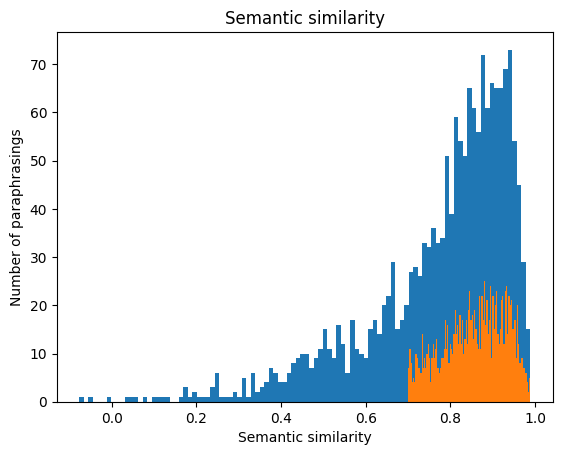

In [6]:
import pandas as pd

# read csv
df = pd.read_csv("data/twitter_data_paraphrasings_w_semantics.csv")

#plot semantic_similarity in df
import matplotlib.pyplot as plt
plt.hist(df['semantic_similarity'], bins=100)
# put a title and labels
plt.title('Semantic similarity')
plt.xlabel('Semantic similarity')
plt.ylabel('Number of paraphrasings')

# filter out paraphrasings with semantic similarity < 0.7
df_semantic_below_7 = df[df['semantic_similarity'] >= 0.7]
plt.hist(df_semantic_below_7['semantic_similarity'], bins=100)


In [8]:
print(len(df_semantic_below_7))
print(len(df))

1302
1732
